In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.subplots as sp
import plotly.graph_objs as go
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')


# Visualization functions

In [2]:
def line_plots(df, number_of_plots):
    # Create subplots with 1 row and 2 columns
    fig = sp.make_subplots(rows=1, cols=number_of_plots)

    # Create an empty list to store the traces
    traces = []

    for i in range(number_of_plots):
        # Add traces to the subplots
        trace = go.Scatter(x=df.index, y=df[str(i)], mode='lines')
        traces.append(trace)

    # Create the figure and add all the traces
    fig = go.Figure(data=traces)

    # Update layout
    fig.update_layout(title='Stacked plots')

    fig.show()

In [3]:
def grid_plot(df):
    # Create a 9x9 grid of line plots
    fig, axes = plt.subplots(9, 9, figsize=(12, 12), sharex=True, sharey=True)

    # Loop through the rows and columns to create line plots
    for i in range(9):
        for j in range(9):
            column_name = str(i * 9 + j)
            sns.lineplot(data=df[column_name], ax=axes[i, j])
            axes[i, j].set_title(f"({i+1}, {j+1})")

    # Adjust layout
    plt.tight_layout()

    plt.savefig('readings_1')
    # Show the plot
    plt.show()

In [4]:
def scatter_plots(df, number_of_plots, y, title, x_names, y_names):
    # Create subplots
    fig = sp.make_subplots(rows=1, cols=1)

    # Create an empty list to store the traces
    traces = []

    for i in range(number_of_plots):
        # Add traces to the subplots
        print(df.columns)
        trace = go.Scatter(x=df[str(i)], y=df[y], mode='markers')
        traces.append(trace)

    # Create the figure and add all the traces
    fig = go.Figure(data=traces)

    # Update layout
    fig.update_layout(title=title)
    fig.update_xaxes(title_text=x_names)
    fig.update_yaxes(title_text=y_names)

    fig.show()

# Create grid for gathering color recognition data

In [5]:
from PIL import Image, ImageDraw

# Create a blank 256x256 image
image_size = (1024, 1024)
image = Image.new("L", image_size)

# Create a drawing object
draw = ImageDraw.Draw(image)

# Define the size of each square
square_size = (image_size[0] // 16, image_size[1] // 16)

# Initialize grayscale value
grayscale_value = 0

# Loop through the grid and set pixel values
for y in range(16):
    for x in range(16):
        # Set the pixel value
        draw.rectangle(
            [x * square_size[0], y * square_size[1], (x + 1) * square_size[0], (y + 1) * square_size[1]],
            fill=grayscale_value
        )

        # Increment grayscale value by 1
        grayscale_value += 1

# Save the image
image.save("consecutive_grayscale_grid_1024x1024.png")

# Show the image (optional)
image.show()

# Data exploration

In [6]:
# Check grayscale grid readings:
df = pd.read_csv("Colab_files/black_flat_sensor_grayscale_grid_1.csv", index_col='Unnamed: 0')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,greyscale_value
0,350.5,562.0,743.5,837.0,905.0,949.0,874.0,960.0,959.0,471.0,...,465.0,529.0,644.0,802.5,795.5,856.0,760.0,931.0,934.5,0
1,351.0,561.5,743.5,836.5,905.0,949.0,873.5,960.0,959.0,471.0,...,465.0,529.0,644.0,802.5,795.5,856.0,760.0,931.0,934.5,0
2,350.0,561.0,743.5,836.0,905.0,949.0,873.5,960.0,959.0,471.0,...,465.0,529.0,644.0,802.5,795.5,856.0,760.0,931.0,934.5,0
3,349.5,561.0,744.0,836.5,905.5,949.0,874.0,960.0,959.0,471.0,...,465.0,528.5,644.0,803.0,795.5,856.0,759.5,931.0,934.0,0
4,350.5,561.0,743.5,836.0,905.5,949.0,874.0,960.0,959.0,471.0,...,465.5,528.0,644.0,802.5,795.0,856.0,759.5,931.0,934.0,0


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,greyscale_value
count,712.000000,712.00000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,...,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,670.379916,773.11236,902.881320,892.150281,955.613764,949.815309,940.188202,963.521067,959.843399,789.919944,...,400.304073,532.482444,641.837781,634.163624,609.027388,535.379213,516.826545,541.794242,462.544944,64.488764
std,195.559562,89.06623,47.724769,55.899346,14.052057,7.809346,32.436572,1.465105,0.602140,164.118206,...,432.040545,424.274135,433.131746,434.115076,430.834536,387.231026,413.101981,450.564126,421.277474,39.229282
min,303.000000,561.00000,743.000000,749.500000,893.000000,886.500000,853.000000,960.000000,955.000000,440.000000,...,-5.000000,-2.500000,0.000000,0.000000,0.000000,-4.000000,-1.000000,-2.000000,-2.000000,0.000000
25%,506.000000,717.37500,891.000000,865.000000,957.000000,950.000000,931.000000,962.000000,960.000000,632.500000,...,-2.000000,0.000000,1.000000,0.500000,4.500000,1.000000,1.000000,-1.000000,0.000000,30.750000
50%,693.000000,825.00000,931.000000,925.000000,961.000000,951.000000,958.000000,964.000000,960.000000,839.500000,...,63.000000,865.000000,968.000000,954.000000,924.250000,771.000000,696.000000,928.000000,503.250000,62.000000
75%,863.500000,843.00000,933.000000,932.000000,963.000000,953.000000,962.000000,965.000000,960.000000,949.000000,...,918.000000,910.000000,970.000000,956.000000,954.000000,861.000000,922.000000,933.000000,928.000000,98.000000
max,933.000000,845.00000,935.500000,934.000000,964.000000,955.000000,963.000000,965.000000,961.000000,959.000000,...,919.000000,917.000000,979.000000,960.000000,955.000000,864.000000,930.000000,933.000000,940.000000,135.000000


# Import files for regression

Index(['0', 'greyscale_value_0'], dtype='object')


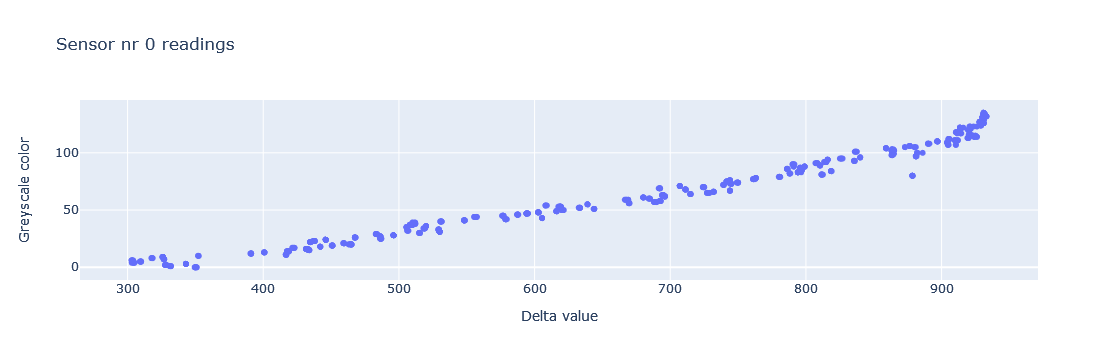

In [63]:
df_stones = pd.DataFrame()
nr_of_files = 1
for file_nr in range(1, nr_of_files + 1):
    df = pd.read_csv(f"Colab_files/black_flat_sensor_grayscale_grid_{file_nr}.csv", index_col='Unnamed: 0')
    df_stones[f"{str(file_nr-1)}"] = df[['0']]
    df_stones[f"greyscale_value_{str(file_nr-1)}"] = df[['greyscale_value']]

scatter_plots(df_stones, nr_of_files, 'greyscale_value_0', 'Sensor nr 0 readings', 'Delta value', 'Greyscale color')


# Data cleaning

In [9]:
# Drop rows where the measurement was done incorrectly
df_stones = df_stones[df_stones['greyscale_value_0'] != 80]
df_stones = df_stones[df_stones['greyscale_value_0'] != 97]
df_stones = df_stones[df_stones['greyscale_value_0'] != 0]

# Data visualization

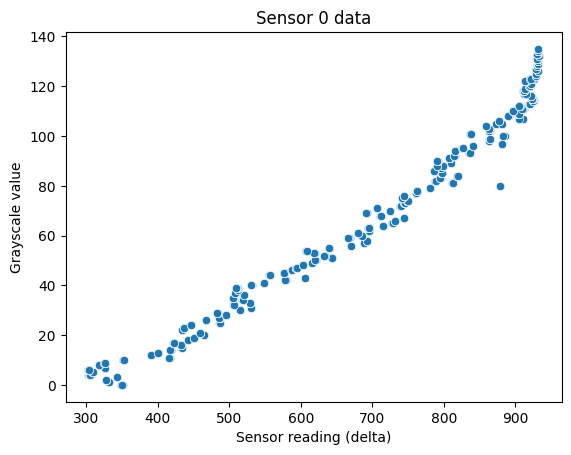

In [64]:
sns.scatterplot(x = '0', y = 'greyscale_value_0', data = df_stones);

# Set title and axis labels
plt.title('Sensor 0 data')
plt.xlabel('Sensor reading (delta)')
plt.ylabel('Grayscale value')

# Show the plot
plt.show()

# Regression

In [11]:
# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

X = df_stones[['0']]
y = df_stones[['greyscale_value_0']]

## Train, test, validation split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

## Preprocessing

## Training

In [13]:
pipe = Pipeline([('sc', StandardScaler()),
                 ('poly', PolynomialFeatures()),
                 ('lr', LinearRegression())
                 ])
params = {'poly__degree': np.arange(10)}
gs = GridSearchCV(pipe,
                  param_grid = params,
                  cv = 10,
                  verbose = 3,
                  return_train_score=True,
                  refit=True
)
gs.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END poly__degree=0;, score=(train=0.000, test=-0.000) total time=   0.0s
[CV 2/10] END poly__degree=0;, score=(train=0.000, test=-0.107) total time=   0.0s
[CV 3/10] END poly__degree=0;, score=(train=0.000, test=-0.001) total time=   0.0s
[CV 4/10] END poly__degree=0;, score=(train=0.000, test=-0.006) total time=   0.0s
[CV 5/10] END poly__degree=0;, score=(train=0.000, test=-0.006) total time=   0.0s
[CV 6/10] END poly__degree=0;, score=(train=0.000, test=-0.033) total time=   0.0s
[CV 7/10] END poly__degree=0;, score=(train=0.000, test=-0.002) total time=   0.0s
[CV 8/10] END poly__degree=0;, score=(train=0.000, test=-0.105) total time=   0.0s
[CV 9/10] END poly__degree=0;, score=(train=0.000, test=-0.043) total time=   0.0s
[CV 10/10] END poly__degree=0;, score=(train=0.000, test=-0.004) total time=   0.0s
[CV 1/10] END poly__degree=1;, score=(train=0.971, test=0.970) total time=   0.0s
[CV 2/10] END poly__degr

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('lr', LinearRegression())]),
             param_grid={'poly__degree': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True, verbose=3)

In [14]:
gs.score(X_train, y_train)

0.9930577963889095

## Model validation

In [15]:
gs.score(X_test, y_test)


0.9931734082087877

In [16]:
gs.best_params_

{'poly__degree': 9}

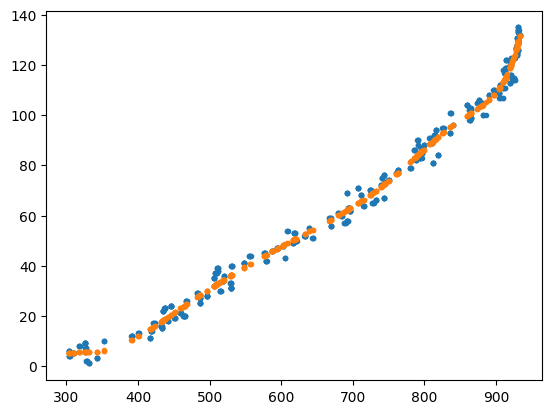

In [17]:
plt.plot(X, y, '.')
plt.plot(X_train, gs.predict(X_train), '.')

## Export model

In [18]:
import joblib
joblib.dump(gs.best_estimator_, 'ADC_to_color.pkl')

['ADC_to_color.pkl']

## Import model test

In [19]:
gs = joblib.load("ADC_to_color.pkl")

Text(0, 0.5, 'Grayscale color')

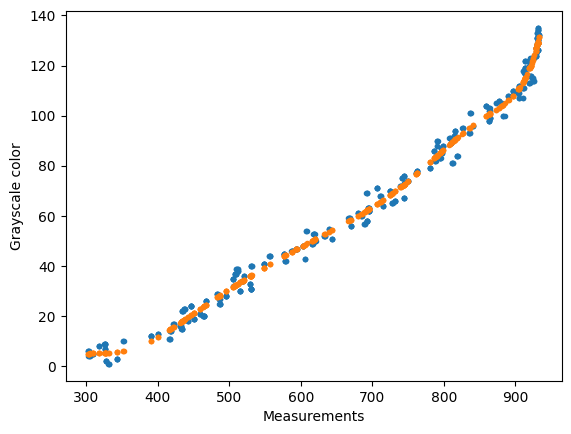

In [20]:
plt.plot(X, y, '.')
plt.plot(X_train, gs.predict(X_train), '.')
plt.xlabel("Measurements")
plt.ylabel("Grayscale color")

## Test prediction

In [21]:
print(gs.predict(pd.DataFrame([900])).astype(int)[0][0])

109


# Color classification

## Data import

In [22]:
df_stones = pd.DataFrame()
nr_of_files = 4
sensors_saved = ['0', '2', '18', '20']
sensors_saved_2 = ['0']
colors_saved = [str(f"color_{i}") for i in sensors_saved]

for file_nr in range(1, nr_of_files + 1):
    df = pd.read_csv(f"Colab_files/stone_classification_4_sensors_{file_nr}.csv", index_col='Unnamed: 0')
    df_stones = pd.concat([df_stones, df], ignore_index=True)

df_stones = df_stones[sensors_saved+colors_saved]
df_stones= df_stones.replace({"w": "white", "b": "black", "n": "none"})

## Data cleaning

In [23]:
# Remove readings that were ambiguous
df_2_stones = df_stones[['0', 'color_0']]
df_2_stones = df_2_stones.loc[(df_2_stones['color_0'] != 'black') | (df_2_stones['0'] > -200)]
df_2_stones = df_2_stones.loc[(df_2_stones['color_0'] != 'none') | (df_2_stones['0'] < -5000)]

## Data exploration

Text(0.5, 0, 'Stone color')

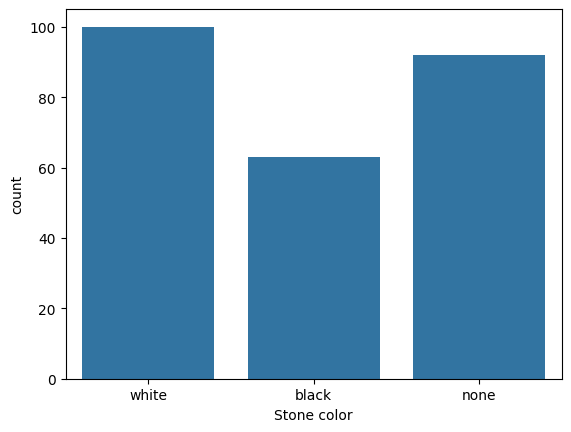

In [24]:
sns.countplot(data=df_2_stones, x='color_0')
plt.xlabel("Stone color")

Text(0.5, 0, 'Stone color')

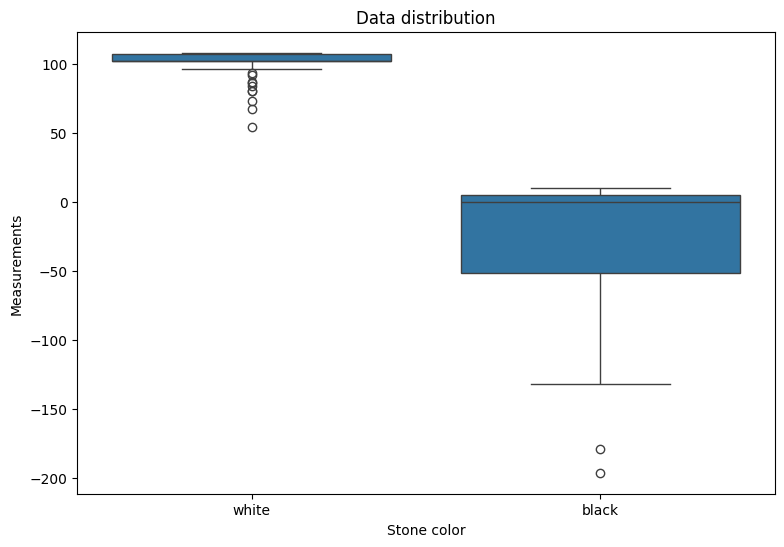

In [25]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'color_0', y = '0', data = df_2_stones.loc[(df_2_stones['color_0'] != 'none')]);
plt.title("Data distribution")
plt.ylabel("Measurements")
plt.xlabel("Stone color")

Text(0.5, 0, 'Stone color')

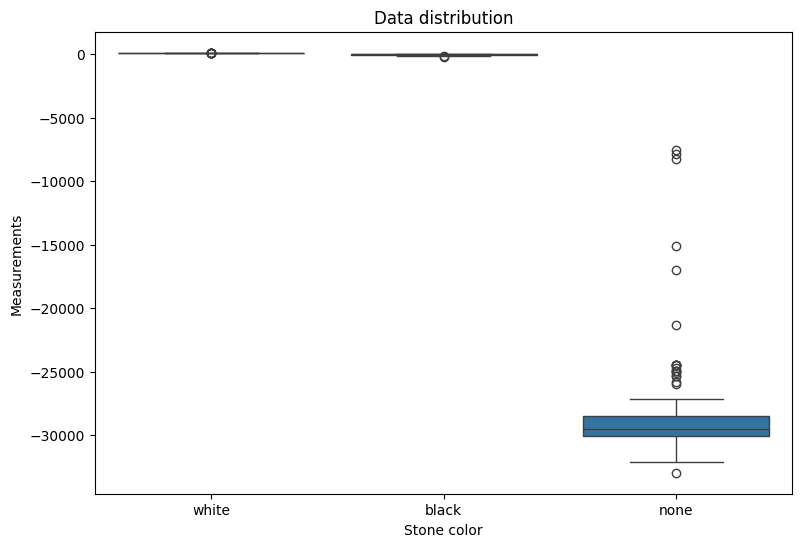

In [26]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'color_0', y = '0', data = df_2_stones);
plt.title("Data distribution")
plt.ylabel("Measurements")
plt.xlabel("Stone color")

In [27]:
# Training data

In [28]:
from sklearn.model_selection import train_test_split
X = df_2_stones[['0']]
y = df_2_stones['color_0']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify = y)

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Logistic regression

In [30]:
pipe = Pipeline([('sc', StandardScaler()),
                 ('poly', PolynomialFeatures(include_bias=False)),
                 ('lr', LogisticRegression())
                 ])

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
params = {'poly__degree': np.arange(3),
          'lr__C': np.logspace(-3, 0, 10),
          'lr__penalty': ['l1', 'l2']
          }

gs = GridSearchCV(pipe,
                  param_grid = params,
                  cv = 10,
                  verbose = 3,
                  return_train_score=True,
                  n_jobs=2,
                  scoring='accuracy'
)
gs.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('lr', LogisticRegression())]),
             n_jobs=2,
             param_grid={'lr__C': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ]),
                         'lr__penalty': ['l1', 'l2'],
                         'poly__degree': array([0, 1, 2])},
             return_train_score=True, scoring='accuracy', verbose=3)

In [33]:
gs.best_params_

{'lr__C': 0.0021544346900318843, 'lr__penalty': 'l2', 'poly__degree': 1}

In [34]:
def predict_stone(y, threshold, X_train):
    stones = list()
    for i, prob in enumerate(y):
        if prob[0] > threshold:
            stones.append("black")
        elif prob[1] > threshold:
            stones.append("none")
        elif prob[2] > threshold:
            stones.append("white")
        else:
            stones.append("misplaced")
            print(f"Misplaced stone with index: {i} with probability of being black {prob[0]}, value {X_train.iloc[i].values}, probability of being none {prob[1]}, , probability of being white {prob[2]}")
    return stones

In [35]:
y_train_pred = gs.predict_proba(X_train) # predict_proba
y_train_pred = predict_stone(y_train_pred, 0.6, X_train)

Misplaced stone with index: 0 with probability of being black 0.25950023198801947, value [4], probability of being none 0.3149363914918026, , probability of being white 0.425563376520178
Misplaced stone with index: 1 with probability of being black 0.25948263053114484, value [-11], probability of being none 0.31500036573707524, , probability of being white 0.42551700373178
Misplaced stone with index: 2 with probability of being black 0.25948497761155914, value [-9], probability of being none 0.3149918354371097, , probability of being white 0.4255231869513311
Misplaced stone with index: 3 with probability of being black 0.25950140528339766, value [5], probability of being none 0.31493212678865684, , probability of being white 0.4255664679279455
Misplaced stone with index: 4 with probability of being black 0.25961513465867836, value [102], probability of being none 0.3145185971479603, , probability of being white 0.4258662681933614
Misplaced stone with index: 5 with probability of being 

In [36]:
from sklearn.metrics import classification_report

# Get predictions
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

       black       0.00      0.00      0.00      50.0
   misplaced       0.00      0.00      0.00       0.0
        none       0.00      0.00      0.00      74.0
       white       0.00      0.00      0.00      80.0

    accuracy                           0.00     204.0
   macro avg       0.00      0.00      0.00     204.0
weighted avg       0.00      0.00      0.00     204.0



In [37]:
y_train_pred_class = pd.DataFrame(y_train_pred).value_counts()
y_train_pred_class

0        
misplaced    204
Name: count, dtype: int64

In [38]:
y_test_pred = gs.predict_proba(X_test)
y_test_pred = predict_stone(y_test_pred, 0.8, X_test)
print(classification_report(y_test, y_test_pred))

Misplaced stone with index: 0 with probability of being black 0.2596045891383295, value [93], probability of being none 0.3145569536605202, , probability of being white 0.42583845720115027
Misplaced stone with index: 1 with probability of being black 0.25961513465867836, value [102], probability of being none 0.3145185971479603, , probability of being white 0.4258662681933614
Misplaced stone with index: 2 with probability of being black 0.2595072715070004, value [10], probability of being none 0.314910803735242, , probability of being white 0.4255819247577575
Misplaced stone with index: 3 with probability of being black 0.21980498648862346, value [-28561], probability of being none 0.4468938841404046, , probability of being white 0.333301129370972
Misplaced stone with index: 4 with probability of being black 0.25942980336912, value [-56], probability of being none 0.31519233006266434, , probability of being white 0.42537786656821563
Misplaced stone with index: 5 with probability of bei

In [39]:
y_test_pred_class = pd.DataFrame(y_test_pred).value_counts()
y_test_pred_class

0        
misplaced    51
Name: count, dtype: int64

# Random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier()
param_grid = {
    "max_depth": np.arange(2,5),
    "min_samples_split": np.arange(2,10),
    "min_samples_leaf": np.arange(2,10),
    "n_estimators": [10, 20, 30]
}

gs = GridSearchCV(rfc,
                  param_grid,
                  cv = 10,
                  verbose = 4,
                  n_jobs=2,
                  scoring='accuracy'
)
gs.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': array([2, 3, 4]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [10, 20, 30]},
             scoring='accuracy', verbose=4)

In [42]:
y_train_pred = gs.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

       black       1.00      1.00      1.00        50
        none       1.00      1.00      1.00        74
       white       1.00      1.00      1.00        80

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204



# Predict classes using probability

In [43]:
y_train_pred = gs.predict_proba(X_train)
print(len(y_train_pred))
y_train_pred = predict_stone(y_train_pred, 0.8, X_train)

204
Misplaced stone with index: 141 with probability of being black 0.4, value [-8262], probability of being none 0.6, , probability of being white 0.0


In [44]:
values = pd.DataFrame(np.arange(100))
values_predict = gs.predict_proba(values)

In [45]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

       black       1.00      1.00      1.00        50
   misplaced       0.00      0.00      0.00         0
        none       1.00      0.99      0.99        74
       white       1.00      1.00      1.00        80

    accuracy                           1.00       204
   macro avg       0.75      0.75      0.75       204
weighted avg       1.00      1.00      1.00       204



In [46]:
y_train_pred_class = pd.DataFrame(y_train_pred).value_counts()
y_train_pred_class

0        
white        80
none         73
black        50
misplaced     1
Name: count, dtype: int64

In [47]:
y_test_pred = gs.predict_proba(X_test)
y_test_pred = predict_stone(y_test_pred, 0.8, X_test)
print(classification_report(y_test, y_test_pred))

Misplaced stone with index: 10 with probability of being black 0.4, value [-7858], probability of being none 0.6, , probability of being white 0.0
Misplaced stone with index: 32 with probability of being black 0.4, value [-7547], probability of being none 0.6, , probability of being white 0.0
              precision    recall  f1-score   support

       black       1.00      1.00      1.00        13
   misplaced       0.00      0.00      0.00         0
        none       1.00      0.89      0.94        18
       white       1.00      1.00      1.00        20

    accuracy                           0.96        51
   macro avg       0.75      0.72      0.74        51
weighted avg       1.00      0.96      0.98        51



In [48]:
y_test_pred_class = pd.DataFrame(y_test_pred).value_counts()
y_test_pred_class

0        
white        20
none         16
black        13
misplaced     2
Name: count, dtype: int64

In [49]:
import joblib
joblib.dump(gs.best_estimator_, 'color_to_class.pkl')

['color_to_class.pkl']

# Import model test

In [56]:
gs_color = joblib.load("color_to_class.pkl")

# Test predictions

In [62]:
print(gs_color.predict(pd.DataFrame({'0': [109]})))

['white']


# Adding median filter to filter out hand movement

<Axes: >

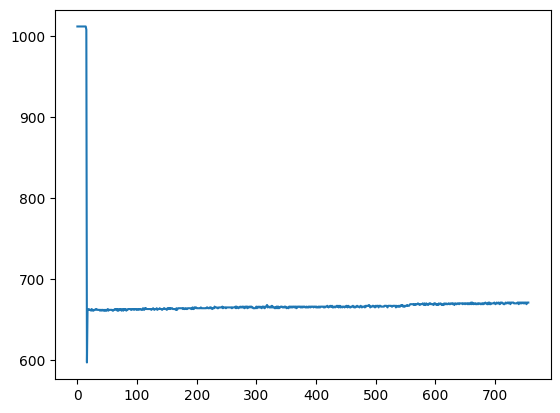

In [50]:
# Import raw data from an example game
df = pd.read_csv("Colab_files/game_history_1.csv", index_col='Unnamed: 0')
df.head()

# Calculate diffs
for column in df.columns[:-1]:
    diff_column_name = f'{column}_d'
    df[diff_column_name] = df[column].diff()

# Calculate the mean of moving 3 samples for each column
window_size = 6
raw_columns = df.columns

for column in raw_columns:
    new_column_name = f'{column}_mean'
    df[new_column_name] = df[column].rolling(window=window_size).median()

df['20'].plot()

# Check data for flat black stones

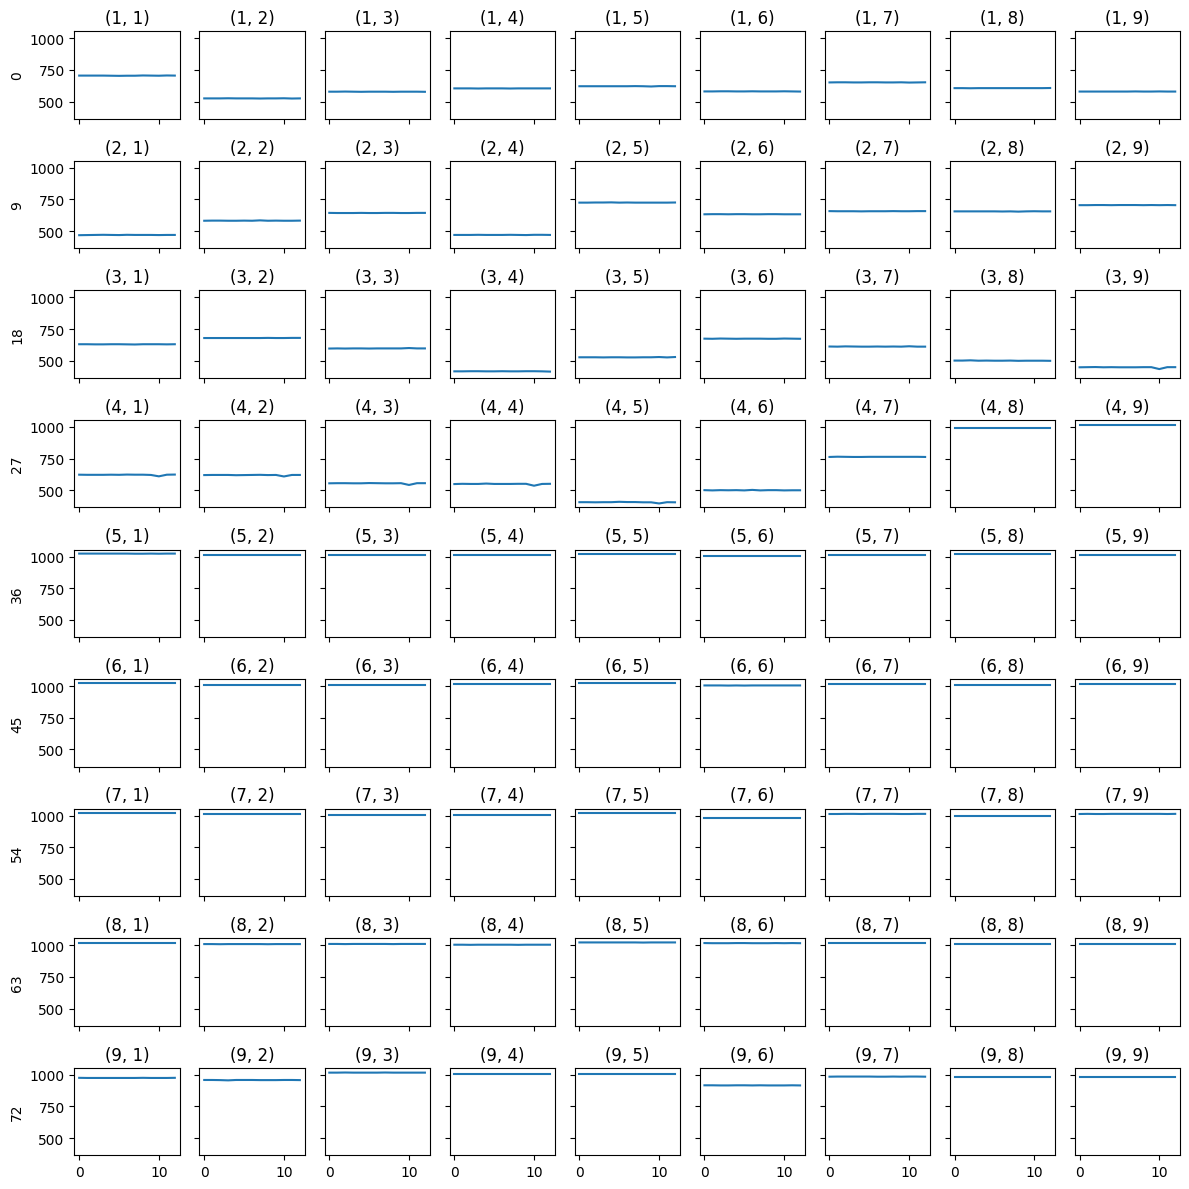

In [51]:
# Check flat black stones readings:
df = pd.read_csv("Colab_files/black_flat_1.csv", index_col='Unnamed: 0')
grid_plot(df)

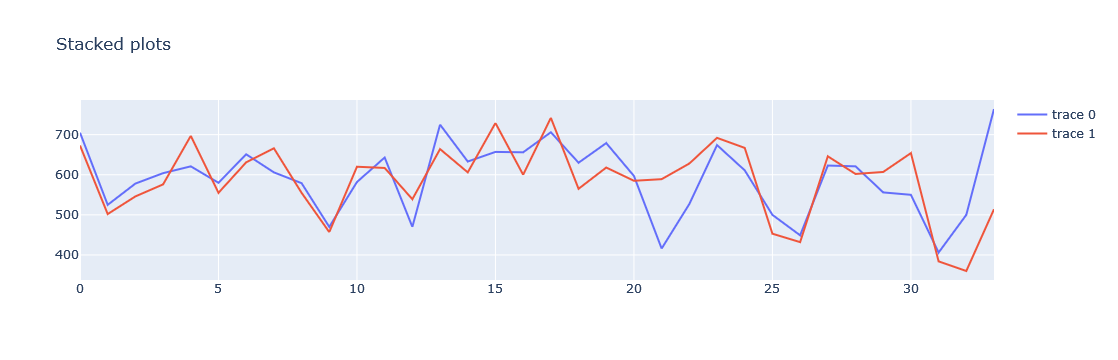

In [52]:
# Calculate median readings for first 34 stones
df_stones = pd.DataFrame(index=range(34))
cols = [str(x) for x in range(34)]
for file_nr in range(1, 3):
    df = pd.read_csv(f"Colab_files/black_flat_{file_nr}.csv", index_col='Unnamed: 0')
    for column in cols:
        # Use loc to insert the new row at the end
        df_stones.loc[int(column), f"{str(file_nr-1)}"] = df[column].median()

line_plots(df_stones, 2)

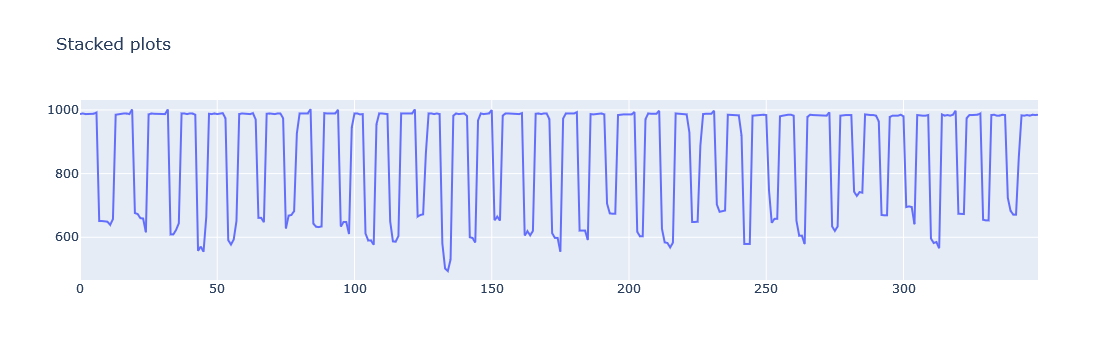

In [53]:
# Check 34 black flat stones on sensors
df_stones = pd.DataFrame()
nr_of_files = 1
for file_nr in range(1, nr_of_files + 1):
    df = pd.read_csv(f"Colab_files/black_flat_sensor_1_{file_nr}.csv", index_col='Unnamed: 0')
    df_stones[f"{str(file_nr-1)}"] = df[['0']]
line_plots(df_stones, nr_of_files)